In [1]:

"""
Classifiaction problem related to Plant Prediction.

Authors:
-------

Group-123

Snigdha Tarua - 2019ab04171
Sanka Mahesh Sai - 2019ab04135
Aravapalli Chandra Sekhar Gupta - 2019ab04187

"""

'\nClassifiaction problem related to Plant Prediction.\n\nAuthors:\n-------\n\nGroup-123\n\nSnigdha Tarua - 2019ab04171\nSanka Mahesh Sai - 2019ab04135\nAravapalli Chandra Sekhar Gupta - 2019ab04187\n\n'

## Description about data columns

In [2]:
import pandas as pd
import numpy as np

meta_data = pd.read_excel("Plant_Tree_data.xlsx", "Sheet2")

meta_data

,Columns,Meaning
0,LeafLength,The average length of leaf on a tree
1,LeafBreadth,The average breadth of leaf on a tree
2,ErrorLeafLength,Average error in measuring tree length
3,ErrorLeafBreadth,Average error in measuring tree breadth
4,LeafCurveAngle,The measure of how curved is the leaf of the tree
5,EdgeCurvatureAngle,Angle at which the current leaf and stem curve...
6,ErrorLeafCurvature,Error in measuring the angle of edge curvature
7,TreeLength,Length of tree
8,TreeType,Type of tree


In [3]:
data = pd.read_excel("Plant_Tree_data.xlsx", "Sheet1")
data.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
data.describe()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
LeafLength            17898 non-null float64
LeafBreadth           17898 non-null float64
ErrorLeafLength       17898 non-null float64
ErrorLeafBreadth      17898 non-null float64
LeafCurveAngle        17898 non-null float64
EdgeCurvatureAngle    17898 non-null float64
ErrorLeafCurvature    17898 non-null float64
TreeLength            17898 non-null float64
TreeType              17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
data.isnull().sum(), data.shape

(LeafLength            0
 LeafBreadth           0
 ErrorLeafLength       0
 ErrorLeafBreadth      0
 LeafCurveAngle        0
 EdgeCurvatureAngle    0
 ErrorLeafCurvature    0
 TreeLength            0
 TreeType              0
 dtype: int64, (17898, 9))

## Objective:

* Predict tree-type based on given features.


## Inference:

* Data is not having any null entries.
* Shape of dataframe : (17898, 9)
* We have all the features that are related to the tree such as Leaflength, Leafbreadth, corresponding errors, angles and length of the tree and to be used to predict type of the tree.

In [7]:
import seaborn as sns

sns.countplot(data["TreeType"])

print("Distribution of value counts..")
print(data["TreeType"].value_counts())
print("\n")
print("Distribution of value counts according to percentage..")
print(data["TreeType"].value_counts(normalize=True))

Distribution of value counts..
0    16259
1     1639
Name: TreeType, dtype: int64


Distribution of value counts according to percentage..
0    0.908426
1    0.091574
Name: TreeType, dtype: float64


## Observation:

* We can see the class imbalence present in the dataset -- 90.8% -ve class and 0.09% +ve class

## Exploratory Data Analysis

(9.0, 0.0)

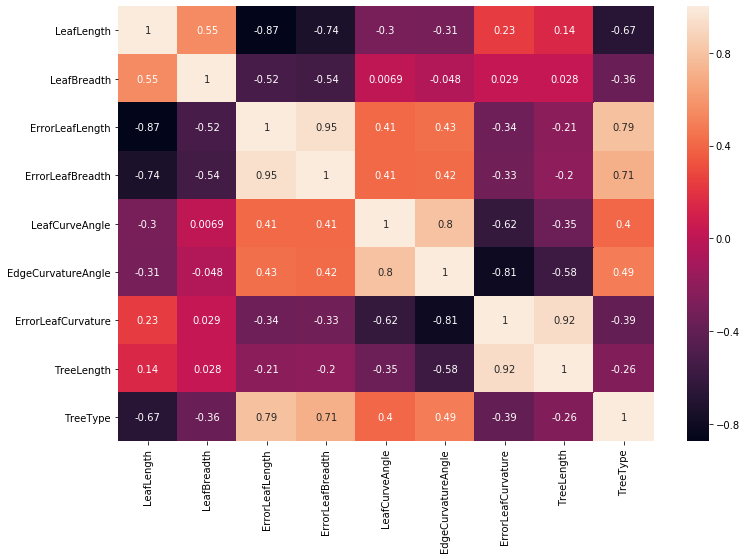

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
df_corr = data.corr()
ax = sns.heatmap(df_corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Observations:

* ErrorLeafLength, errorleafbreadth followed by leaflength are propotional to target.
* Also, leaf length and error of leaf length and breadth are negatively correlated.
* Errorleaf length and error leaf breadth are highly correlated and it makes sense -- as if it's difficult to measure height it's difficult to measure breadth as well for the same leaf.


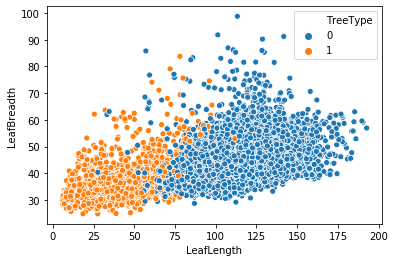

In [9]:
sns.scatterplot(data=data, x="LeafLength", y="LeafBreadth", hue="TreeType")

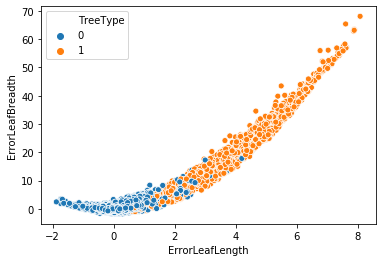

In [10]:
sns.scatterplot(data=data, x="ErrorLeafLength", y="ErrorLeafBreadth", hue="TreeType")

In [11]:
data["TreeType"] = data["TreeType"].astype(str)

## We can see a clear trend that as errors increase the target is moving towards 1.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
LeafLength            17898 non-null float64
LeafBreadth           17898 non-null float64
ErrorLeafLength       17898 non-null float64
ErrorLeafBreadth      17898 non-null float64
LeafCurveAngle        17898 non-null float64
EdgeCurvatureAngle    17898 non-null float64
ErrorLeafCurvature    17898 non-null float64
TreeLength            17898 non-null float64
TreeType              17898 non-null object
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [13]:
def dist_plot(subplot, column):
    """
    Plot distplot for seaborn
    """
    
    plt.figure(1, figsize=(10,10))
    
    plt.subplot(subplot)
    sns.distplot(data[column])
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()[0]
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='g', linestyle='-')
    plt.axvline(mode, color='b', linestyle='-')
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
    plt.ylabel('Frequency', fontsize=12)

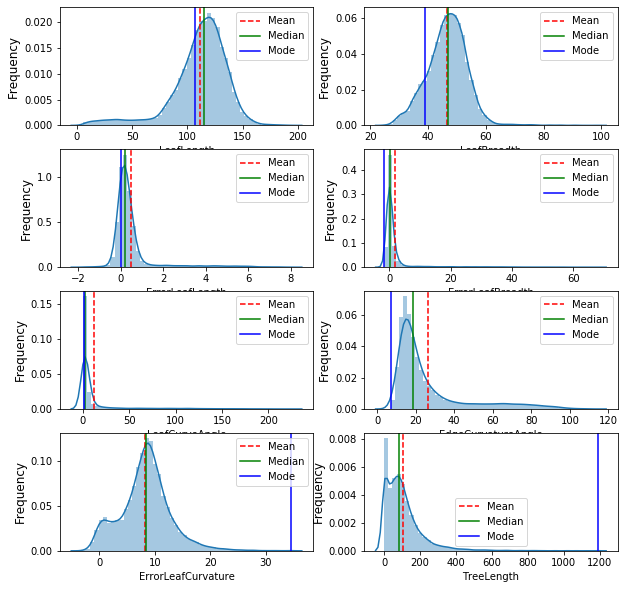

In [14]:
dist_plot(421, "LeafLength")
dist_plot(422, "LeafBreadth")
dist_plot(423, "ErrorLeafLength")
dist_plot(424, "ErrorLeafBreadth")
dist_plot(425, "LeafCurveAngle")
dist_plot(426, "EdgeCurvatureAngle")
dist_plot(427, "ErrorLeafCurvature")
dist_plot(428, "TreeLength")

## For the dataset, implement the Linear SVM classifier using Python. [6M]

### The marks distribution is as follows

* Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
* Split features and labels [0.5M]
* Split train and test data [0.5M}
* Implement Linear SVM Classifier [2M]
* Calculate accuracy measures [1.5M]

### Import the libraries and Load the dataset and Remove/replace missing values

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [16]:
# dataframe is loaded into data.
data.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


No missing values so we are not going to take any steps related to imputation.

### Split features and labels

In [17]:
X = data.drop("TreeType", axis=1)
y = data["TreeType"]

display(X.head()), display(y.head())

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


0    0
1    0
2    0
3    0
4    0
Name: TreeType, dtype: object

(None, None)

### Split train and test data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (14318, 8)
X_test shape :  (3580, 8)
y_train shape :  (14318,)
y_test shape :  (3580,)


### Implement Linear SVM Classifier

In [19]:
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=1e-05, verbose=0))],
         verbose=False)

In [20]:
y_pred = clf.predict(X_test)

### Calculate accuracy measures

In [21]:
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score, classification_report, confusion_matrix


print('Accuracy:', accuracy_score(y_test, y_pred))

print('F1 score:', f1_score(y_test, y_pred,
                            average='weighted'))

print('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))

print('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))

print('\n Clasification report: \n\n', classification_report(y_test, y_pred))

print('\n Confusion matrix: \n\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9818435754189944
F1 score: 0.981341597949294
Recall: 0.9818435754189944
Precision: 0.981362342240144

 Clasification report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.82      0.87       274

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580


 Confusion matrix: 

 [[3289   17]
 [  48  226]]


## For the same dataset, implement classification Kernel SVM using Python. [6M]

### The marks distribution is as follows

* Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
* Split features and labels [0.5M]
* Split train and test data [0.5M}
* Implement Linear SVM Classifier [2M]
* Calculate accuracy measures [1.5M]

### Import the libraries and Load the dataset and Remove/replace missing values

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [23]:
# dataframe is loaded into data.
data.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


No missing values so we are not going to take any steps related to imputation.

### Split features and labels

In [24]:
X = data.drop("TreeType", axis=1)
y = data["TreeType"]

display(X.head()), display(y.head())

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


0    0
1    0
2    0
3    0
4    0
Name: TreeType, dtype: object

(None, None)

### Split train and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (14318, 8)
X_test shape :  (3580, 8)
y_train shape :  (14318,)
y_test shape :  (3580,)


### Implement Linear SVM Classifier

In [26]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [27]:
y_pred = clf.predict(X_test)

### Calculate accuracy measures

In [28]:
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score, classification_report, confusion_matrix


print('Accuracy:', accuracy_score(y_test, y_pred))

print('F1 score:', f1_score(y_test, y_pred,
                            average='weighted'))

print('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))

print('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))

print('\n Clasification report: \n\n', classification_report(y_test, y_pred))

print('\n Confusion matrix: \n\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9826815642458101
F1 score: 0.9823162760905376
Recall: 0.9826815642458101
Precision: 0.9822586340530475

 Clasification report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.92      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580


 Confusion matrix: 

 [[3287   19]
 [  43  231]]
